In [1]:
from IPython.core.display import display, HTML
display(HTML('<style>.container { width:80% !important; }</style>'))

In [2]:
# Problem Set 1 (lz -Effect) Numerics 3
import matplotlib.pyplot as plt
import numpy as np
from qutip import *

In [4]:
# Pauli Matrices
x = sigmax() 
y = sigmay()
z = sigmaz()

# Coefficients for Hamiltonian
epsilon = 1

# Define time for integration
time_end = 2*4*np.pi/epsilon; # the end time
time_array = np.linspace(start = 0, stop = time_end, num = 1001) # time array
state0 = basis (2, 1) # at time = 0, we start from state = |1>

# Define array to store results
results = [[float for i in range(1)] for j in range(1001)]

H0 = -0.5*epsilon*z
H1 = -0.5*x

# Define time-dependent Hamiltonian
def Hamiltonian (tlist, args):
    return H0 + H1*(tlist*10/time_end - 5)

In [5]:
# Find the time evolution of H with base state state0
dummy = sesolve(Hamiltonian, state0, time_array, [], {})
list_of_state = dummy.states

In [6]:
# Find the population quantum state
for i in range (0, len(list_of_state)):
    new_Qobj = list_of_state[i].dag() # find the dagger of the state which will yield a bra state
    results[i] = (abs(new_Qobj.overlap(state0)))**2 # find the magnitude square of inner product btween state
                                                    # and 0 basis

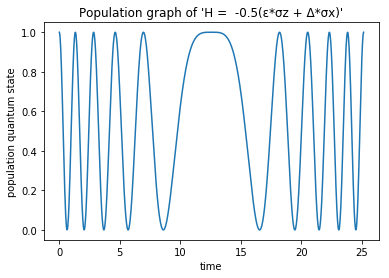

In [7]:
# Plot time vs population quantum states 
plt.plot(time_array, results)
plt.title('Population graph of \'H =  -0.5(\u03B5*\u03C3z + \u0394*\u03C3x)\'')
plt.xlabel('time')
plt.ylabel('population quantum state')
plt.show()

In [8]:
# check fidelity
# 1. Find final state eigenvalues
# 2. Evolve using ground state based on Hamiltonian with delta = -5
# 3. For each state, take the inner product using final state
# 4. Plot the result you get from step 3
# 5. Inner Product should converge to 1 at time = time_end 

# Define array to store fidelity results
ground_results = [[float for i in range(2)] for j in range(1001)]
excited_results = [[float for i in range(2)] for j in range(1001)]

# Define Hamiltonian for delta = -5 (beginning hamiltonian)
H_start = (-0.5*(epsilon*z - 5*x))
begin_state = H_start.groundstate()[1]

# Define Hamiltonian for delta = 5 (Final hamiltonian)
H_final = -0.5*(epsilon*z + 5*x)

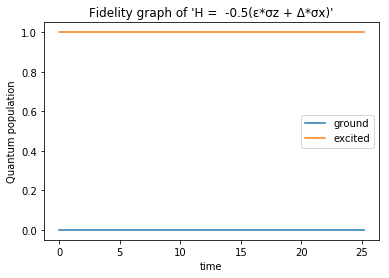

In [9]:
# We will define evolution based on the beginning Hamiltonian
new_list_of_states = sesolve(H = Hamiltonian, psi0 = begin_state, tlist = time_array, e_ops=[], args={}, 
                options=None, progress_bar=None, _safe_mode=True).states

# Find final state eigenvectors
eigen_vectors = H_final.eigenstates()[1]

for i in range (0, len(list_of_state)):
    new_Qobj = new_list_of_states[i].dag()
    ground_results[i] = (abs(new_Qobj.overlap(eigen_vectors[0])))**2
    excited_results[i] = (abs(new_Qobj.overlap(eigen_vectors[1])))**2
    
# Plot time vs fidelity
plt.plot(time_array,ground_results, label = 'ground')
plt.plot(time_array,excited_results, label = 'excited')
plt.title('Fidelity graph of \'H =  -0.5(\u03B5*\u03C3z + \u0394*\u03C3x)\'')
plt.legend()
plt.xlabel('time')
plt.ylabel('Quantum population')
plt.show()    
    